In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('E:\\syntax code\\python\\jupytr\\dataset\\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)

In [5]:
mean_age = df['Age'].mean()

# Mengisi nilai yang hilang dengan nilai rata-rata
df['Age'].fillna(mean_age, inplace=True)

In [6]:
df['Age']

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [7]:
df.isna().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


In [9]:
mfare = df['Fare'].mean()


df['Fare'].fillna(mfare, inplace=True)
df['Fare'].isnull().sum()


0

In [10]:
df.replace({'Sex':{'male':1,'female':0}},inplace=True)
df.replace({'Embarked':{'C':1,'S':0,'Q':2}},inplace=True)
df['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

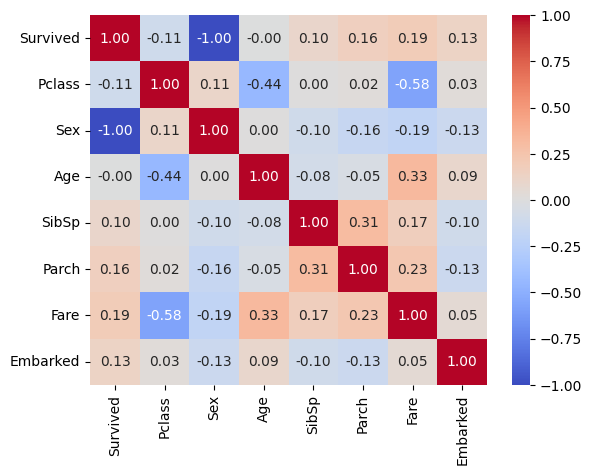

In [11]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


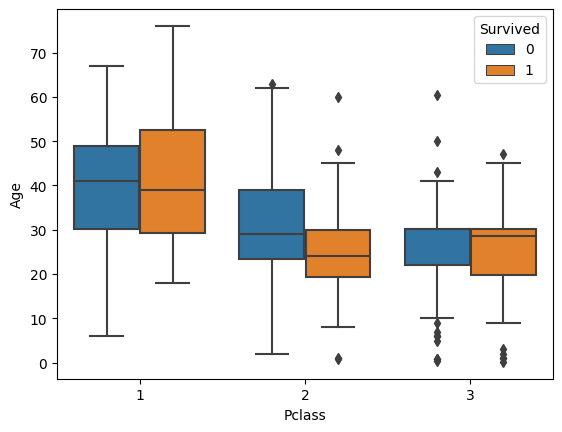

In [12]:
sns.boxplot(x='Pclass', y='Age', data=df, hue='Survived')
plt.show()


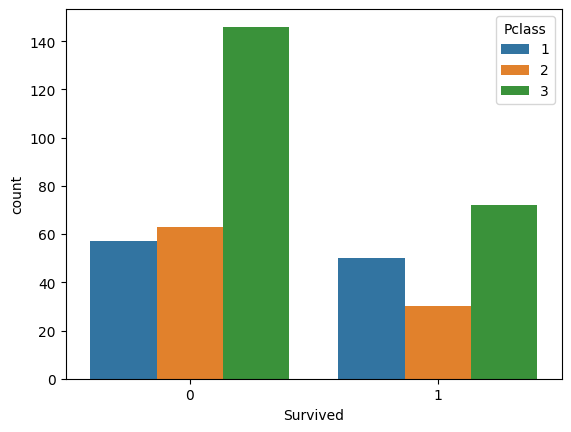

In [13]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()


In [14]:
from scipy.stats import ttest_ind

survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

t_stat, p_value = ttest_ind(survived['Age'], not_survived['Age'], equal_var=False)
print(f"T-Stat: {t_stat}, P-Value: {p_value}")


T-Stat: -0.00022170853965751481, P-Value: 0.9998232656457627


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df.drop(columns='Survived')
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
model = Sequential()
model.add(Dense(units=32, input_shape=(7,), activation='relu'))
model.add(Dense(units=64, activation='relu', kernel_initializer='he_normal', use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal', use_bias=False))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu', kernel_initializer='he_normal', use_bias=False))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu', kernel_initializer='he_normal', use_bias=False))
model.add(Dense(units=1, activation='sigmoid'))

In [17]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=10)

11/11 [==============================] - 1s 2ms/step - loss: 0.9922 - accuracy: 0.4760
Epoch 1/50
34/34 [==============================] - 1s 7ms/step - loss: 0.7642 - accuracy: 0.5569 - val_loss: 0.6773 - val_accuracy: 0.5952
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 0.7349 - accuracy: 0.6287 - val_loss: 0.6525 - val_accuracy: 0.5952
Epoch 3/50
34/34 [==============================] - 0s 4ms/step - loss: 0.7022 - accuracy: 0.5449 - val_loss: 0.6580 - val_accuracy: 0.5952
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 0.7144 - accuracy: 0.5569 - val_loss: 0.6563 - val_accuracy: 0.5952
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6557 - val_loss: 0.6498 - val_accuracy: 0.6190
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6317 - val_loss: 0.6548 - val_accuracy: 0.6071
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 0

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# If you have a binary classification problem, you can use sklearn's classification_report
from sklearn.metrics import classification_report

# Assuming 'y_pred' is the predicted labels for your test set
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Assuming 'y_test' is the true labels for your test set
print(classification_report(y_test, y_pred_binary))

1/3 [=========>....................] - ETA: 0s - loss: 0.5942 - accuracy: 0.8750

3/3 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.9048
Test Loss: 0.5881
Test Accuracy: 0.9048
3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.76      0.87        34

    accuracy                           0.90        84
   macro avg       0.93      0.88      0.90        84
weighted avg       0.92      0.90      0.90        84



3/3 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.9048
Test Accuracy: 90.48%
3/3 [==============================] - 0s 1ms/step


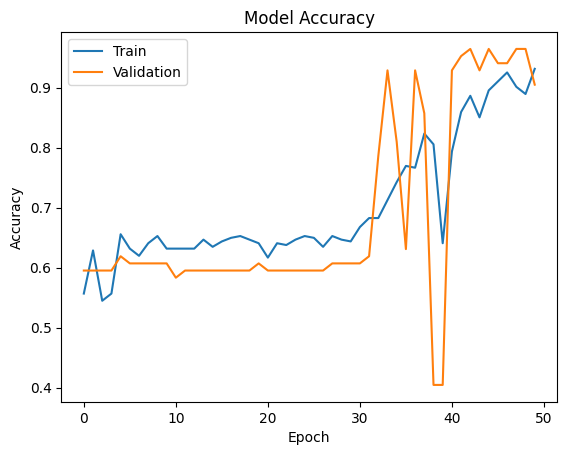

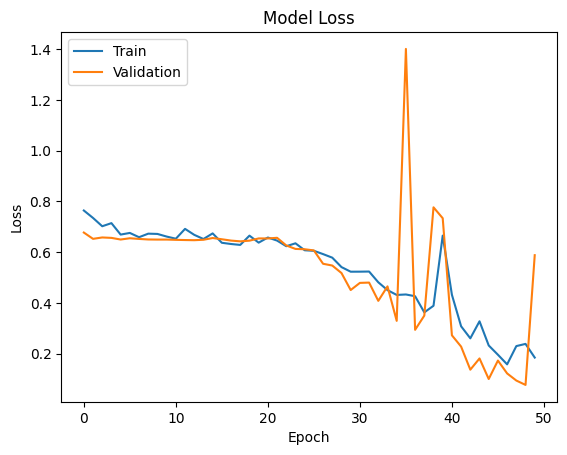

In [19]:
# Evaluasi model pada data uji
evaluation = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menyimpan riwayat pelatihan untuk visualisasi
import matplotlib.pyplot as plt

# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss pelatihan dan validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [20]:
import joblib
#model.save_weights('Weights_Model_FNN_Titanic.h5')
#model.save('Model_FNN_Titanic.h5')
joblib.dump(scaler, 'scaler_titanic.save')

['scaler_titanic.save']

3/3 [==============================] - 0s 1ms/step


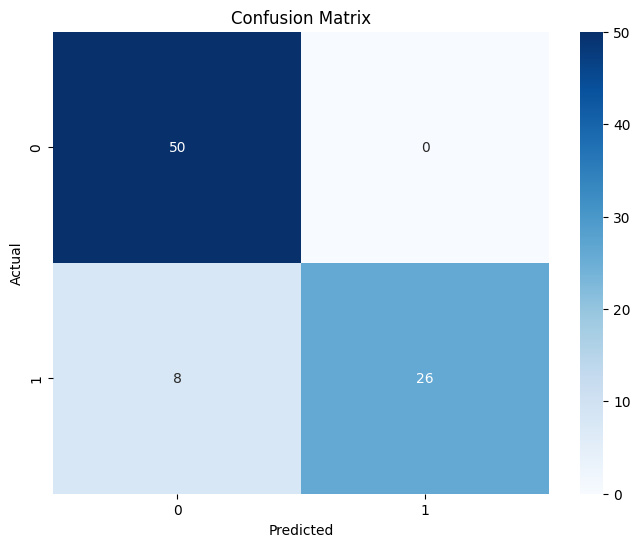

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
y_prob = model.predict(X_test)

# Thresholding untuk mendapatkan kelas biner (0 atau 1)
y_pred = (y_prob > 0.5).astype(int)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Done yak !!